In [201]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SequentialFeatureSelector

In [176]:
df = pd.read_csv('data.csv', header=0 , delimiter =";")

In [177]:
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [178]:
# No missing data
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [179]:
# no NaN values
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [180]:
# change target variable from string to int 
# Dropout 0, Enrolled 1, Graduate 2
df.loc[df['Target'] == 'Dropout', 'Target'] = 0
df.loc[df['Target'] == 'Enrolled', 'Target'] = 1
df.loc[df['Target'] == 'Graduate', 'Target'] = 2

In [181]:
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,2
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,2


In [182]:
df['Target'].value_counts()

2    2209
0    1421
1     794
Name: Target, dtype: int64

In [183]:
# Marital status onehot
one_hot = pd.get_dummies(df['Marital status'])
df = df.drop('Marital status',axis = 1)
df = df.join(one_hot)
df = df.rename(columns={1: "m_status_1", 2: "m_status_2",3: "m_status_3",4: "m_status_4",5: "m_status_5",6: "m_status_6"})

In [184]:
# Application mode onehot
one_hot = pd.get_dummies(df['Application mode'])
df = df.drop('Application mode',axis = 1)
df = df.join(one_hot)
for i in range(58):
    df = df.rename(columns={i: f"app_mode_{i}"})

In [185]:
# Application order onehot
one_hot = pd.get_dummies(df['Application order'])
df = df.drop('Application order',axis = 1)
df = df.join(one_hot)
for i in range(10):
    df = df.rename(columns={i: f"app_order_{i}"})

In [186]:
# Course
one_hot = pd.get_dummies(df['Course'])
df = df.drop('Course', axis = 1)
df = df.join(one_hot)
for i in range(10000):
    df = df.rename(columns={i: f"course_{i}"})

In [187]:
# Daytime or evening attendance
one_hot = pd.get_dummies(df['Daytime/evening attendance\t'])
df = df.drop('Daytime/evening attendance\t', axis = 1)
df = df.join(one_hot)
df = df.rename(columns={0: "day_attendance", 1:"evening_attendance"})

In [188]:
# Previous qualification
one_hot = pd.get_dummies(df['Previous qualification'])
df = df.drop('Previous qualification', axis = 1)
df = df.join(one_hot)
for i in range(50):
    df = df.rename(columns={i: f"prev_quali_{i}"})

In [189]:
# Nationality
one_hot = pd.get_dummies(df['Nacionality'])
df = df.drop('Nacionality', axis = 1)
df = df.join(one_hot)
for i in range(110):
    df = df.rename(columns={i: f"nat_{i}"})


In [190]:
# Mother's qualification
one_hot = pd.get_dummies(df['Mother\'s qualification'])
df = df.drop('Mother\'s qualification', axis = 1)
df = df.join(one_hot)
for i in range(50):
    df = df.rename(columns={i: f"mom_quali_{i}"})
# Father's qualification
one_hot = pd.get_dummies(df['Father\'s qualification'])
df = df.drop('Father\'s qualification', axis = 1)
df = df.join(one_hot)
for i in range(50):
    df = df.rename(columns={i: f"dad_quali_{i}"}) 


In [191]:
one_hot = pd.get_dummies(df['Mother\'s occupation'])
df = df.drop('Mother\'s occupation', axis = 1)
df = df.join(one_hot)
for i in range(200):
    df = df.rename(columns={i: f"mom_oc_{i}"})

one_hot = pd.get_dummies(df['Father\'s occupation'])
df = df.drop('Father\'s occupation', axis = 1)
df = df.join(one_hot)
for i in range(200):
    df = df.rename(columns={i: f"dad_oc_{i}"}) 

In [192]:
df

,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,...,dad_oc_172,dad_oc_174,dad_oc_175,dad_oc_181,dad_oc_182,dad_oc_183,dad_oc_192,dad_oc_193,dad_oc_194,dad_oc_195
0,122.0,127.3,1,0,0,1,1,0,20,0,...,0,0,0,0,0,0,0,0,0,0
1,160.0,142.5,1,0,0,0,1,0,19,0,...,0,0,0,0,0,0,0,0,0,0
2,122.0,124.8,1,0,0,0,1,0,19,0,...,0,0,0,0,0,0,0,0,0,0
3,122.0,119.6,1,0,0,1,0,0,20,0,...,0,0,0,0,0,0,0,0,0,0
4,100.0,141.5,0,0,0,1,0,0,45,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,125.0,122.2,0,0,0,1,1,0,19,0,...,0,0,0,0,0,0,0,0,0,0
4420,120.0,119.0,1,0,1,0,0,0,18,1,...,0,0,0,0,0,0,0,0,0,0
4421,154.0,149.5,1,0,0,1,0,1,30,0,...,0,0,0,0,0,0,0,0,0,0
4422,180.0,153.8,1,0,0,1,0,1,20,0,...,0,0,0,0,0,0,0,0,0,0


In [193]:
df_labels = df['Target'].astype(int)

In [194]:
df = df.drop(columns='Target')

In [195]:
df

,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,...,dad_oc_172,dad_oc_174,dad_oc_175,dad_oc_181,dad_oc_182,dad_oc_183,dad_oc_192,dad_oc_193,dad_oc_194,dad_oc_195
0,122.0,127.3,1,0,0,1,1,0,20,0,...,0,0,0,0,0,0,0,0,0,0
1,160.0,142.5,1,0,0,0,1,0,19,0,...,0,0,0,0,0,0,0,0,0,0
2,122.0,124.8,1,0,0,0,1,0,19,0,...,0,0,0,0,0,0,0,0,0,0
3,122.0,119.6,1,0,0,1,0,0,20,0,...,0,0,0,0,0,0,0,0,0,0
4,100.0,141.5,0,0,0,1,0,0,45,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,125.0,122.2,0,0,0,1,1,0,19,0,...,0,0,0,0,0,0,0,0,0,0
4420,120.0,119.0,1,0,1,0,0,0,18,1,...,0,0,0,0,0,0,0,0,0,0
4421,154.0,149.5,1,0,0,1,0,1,30,0,...,0,0,0,0,0,0,0,0,0,0
4422,180.0,153.8,1,0,0,1,0,1,20,0,...,0,0,0,0,0,0,0,0,0,0


In [196]:
# split dataset
X_train, X_test, y_train, y_test = train_test_split(df, df_labels, test_size=0.2, random_state=42)

In [197]:
y_train

3383    0
2840    1
564     2
1786    0
3900    2
       ..
3444    0
466     1
3092    2
3772    2
860     0
Name: Target, Length: 3539, dtype: int64

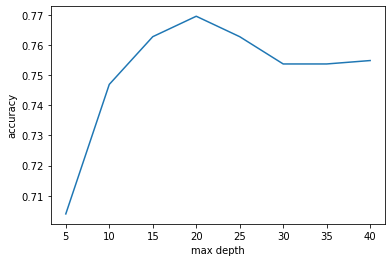

In [198]:
from sklearn.ensemble import RandomForestClassifier

depths = np.arange(5, 41, 5)
accs = []

for d in depths:
  forest = RandomForestClassifier(max_depth=d)
  forest.fit(X_train, y_train)
  y_pred = forest.predict(X_test)
  accs.append(np.sum(y_pred == y_test)/len(y_test))

plt.plot(depths, accs)
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.show()

In [202]:
forest = RandomForestClassifier(max_depth=18)
sfs = SequentialFeatureSelector(forest, n_features_to_select=90)
sfs.fit(X_train, y_train)
sfs.get_support()
sfs.transform(X_train).shape

KeyboardInterrupt: 